# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

# Data

For this example you need to download twitter data from Kaggle: https://www.kaggle.com/kazanova/sentiment140

In [2]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding='ISO-8859-1', 
                 names=[
                        'target',
                        'id',
                        'date',
                        'flag',
                        'user',
                        'text'
                        ])

In [3]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


We have two classes in the dataset

In [4]:
df.target.unique()

array([0, 4], dtype=int64)

Let's check how equally distributed those classes are.

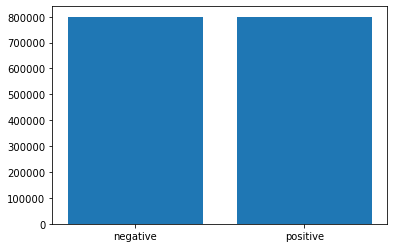

In [5]:
classes = df.target.unique()
counts = []

for i in classes:
  count = len(df[df.target==i])
  counts.append(count)

plt.bar(['negative', 'positive'], counts)
plt.show()

Even class distribution helps us a lot in text classifiction. Imagine a situation where 95% of data is in one class and the rest 5% is split among other 5 classes. If we wouldn't do anything about it model would just learn to guess the 95% class all the time and would be correct 95% of the time on the data we would use.

# Vectorize
What we need to do now is to split the data into training and testing datasets and vectorize (essentialy turning text into number vectors) the text. 

In [5]:
x = df.text.values
y = df.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

Vectorizing

In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

Our vectorized dataset will consist of index of each word that is used in training dataset. We can check how it looks by simply printing the first tweet both as it was and after vectorizing it.

# Modelling
The model that we use here is a simple [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). \\
It's the simpliest model (to my knowledge) to start with text classification and use it's accuracy as a base measure.

In [7]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.800321875


C:\Users\srist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Good, so in the end model learnt to classify both classes about the same. Even though we are using Logistic Regression as a base measure to check if the problem is solvable and what results we might expect some insights can be derived here:

1.   Classes are evenly distributed, thus we won't overtrain on one class compared to the other
2.   Logistic Regression with simple vectorization of words achieved 80% accuracy, meaning we should be able to get a much better result using language models like BERT
3.   Both classes are predicted equally well



# Test

In [12]:
tweet = 'RITIK IS UGLY' 
vectTweet = vectorizer.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
print('Tweet is', 'positive' if prediction[0]==4 else 'negative')

Tweet is negative


Good, so our model is right here. Let's just make sure our model works okay with very specific sentiments.

In [14]:
tweetList = ['Best tweet ever!', 'iTS RAINING HEAVILY']
vectTweet = vectorizer.transform(np.array(tweetList))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
for enum, i in enumerate(tweetList):
  print(i, '| This tweet is', 'positive' if prediction[enum]==4 else 'negative')

Best tweet ever! | This tweet is positive
iTS RAINING HEAVILY | This tweet is negative


In [20]:
df = df.sample(frac=1)
df = df[:100000]
print("Dataset shape:", df.shape)

Dataset shape: (100000, 6)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.target,test_size=0.20)

In [10]:
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count

<80000x82698 sparse matrix of type '<class 'numpy.int64'>'
	with 950339 stored elements in Compressed Sparse Row format>

In [13]:
model1 = MultinomialNB()
model1.fit(x_train_count,y_train)

MultinomialNB()

In [14]:
x_test_count = v.transform(x_test)

In [17]:
model1.score(x_test_count,y_test)

0.7631